
<p style="font-family: Arial; font-size:2em;color:green; font-style:bold"><br>
    Income Classification </p>
    <p style="font-family: Arial;color:black; font-style:bold">Hello,I have worked on the Adult Income daatset. This notebook is based on classifying the income into two groups.This is a dichotomous classification notebook. The goal is to predict whether a certain individual earns more or less than $50,000. </p>
    <p>This notebook has the following sections and subsections</p><br>
    
 <ul >
 <li>IMPORTING LIBRARIES</li>
 <li>CLEANING THE DATA</li>
 <ul><li>Level 1 feature selection using chi-square</li></ul>
 <li>ENCODING THE CATEGORICAL VARIABLES</li>
 <ul><li>Normalizing the variables</li>
 <li>Level 2 feature selection using chi square </li>
 <li>Heatmap of all selected variables</li></ul>
 <li>EXPLORATORY DATA ANALYSIS</li>
 <li>FITTING APPROPRIATE MODEL</li>
 <ul><li>Logistic Regression</li>
 <li>Decision Tree</li>
 <li>Naive Bayes</li>
 <li>Random Forest</li></ul>
 <li>COMPARING ALL MODELS BY THEIR ROC</li>

   

<h2>1. IMPORTING LIBRARIES</h2>

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2>2. CLEANING THE DATA</h2>

First I will import and visualize the data.

In [137]:
adult=pd.read_csv('AdultProject/adult_anonymized_K.csv', na_values=["?"])
print(adult.head())

   age workclass  fnlwgt    education  education.num      marital.status  \
0   61       NaN  135285      HS-grad              9  Married-civ-spouse   
1   44   Private  326232    Bachelors             13            Divorced   
2   32   Private  207668    Bachelors             13       Never-married   
3   41   Private  132222  Prof-school             15  Married-civ-spouse   
4   37   Private  329980      Masters             14  Married-civ-spouse   

        occupation    relationship   race   sex  capital.gain  capital.loss  \
0              NaN         Husband  White  Male             0          2603   
1  Exec-managerial       Unmarried  White  Male             0          2547   
2  Exec-managerial  Other-relative  White  Male             0          2444   
3   Prof-specialty         Husband  White  Male             0          2415   
4  Exec-managerial         Husband  White  Male             0          2415   

   hours.per.week native.country income  
0              32  United-

The missing values are shows as '?'. Hence I will replace them with NAN values.

The dataset has 15 columns. The missing values are ony present in the categorical columns. Several predictive supervise models like KNN or other methods can be used to predict these values and impute them. I will remove them in this case.

In [138]:
adult_new=adult.dropna(axis=0)
print(adult_new.head())
print('Dimensions:',adult.shape)

   age     workclass  fnlwgt    education  education.num      marital.status  \
1   44       Private  326232    Bachelors             13            Divorced   
2   32       Private  207668    Bachelors             13       Never-married   
3   41       Private  132222  Prof-school             15  Married-civ-spouse   
4   37       Private  329980      Masters             14  Married-civ-spouse   
5   39  Self-emp-inc  329980    Bachelors             13  Married-civ-spouse   

        occupation    relationship   race   sex  capital.gain  capital.loss  \
1  Exec-managerial       Unmarried  White  Male             0          2547   
2  Exec-managerial  Other-relative  White  Male             0          2444   
3   Prof-specialty         Husband  White  Male             0          2415   
4  Exec-managerial         Husband  White  Male             0          2415   
5            Sales         Husband  White  Male             0          2415   

   hours.per.week native.country income  
1 

In [139]:
col=adult_new.columns
data_type=adult_new.dtypes
uniq=adult_new.nunique()

print("\n%30s  %10s   %10s\n " % ("Column Name", "Data Type", "Unique Values"))
for i in range(len(adult_new.columns)):
    print("%30s  %10s   %10s " % (col[i],data_type[i],uniq[i]))

print("\nDimensions:",adult_new.shape[0],'rows and ',adult_new.shape[1],'columns')


                   Column Name   Data Type   Unique Values
 
                           age       int64           48 
                     workclass      object            7 
                        fnlwgt       int64        10921 
                     education      object           12 
                 education.num       int64           12 
                marital.status      object            4 
                    occupation      object           12 
                  relationship      object            6 
                          race      object            5 
                           sex      object            2 
                  capital.gain       int64           68 
                  capital.loss       int64           52 
                hours.per.week       int64           85 
                native.country      object           40 
                        income      object            2 

Dimensions: 14434 rows and  15 columns


Replace the dependent column into appropriate format for fitting models.
The education.num column is the numerical representation of education column and hence redundant.

In [140]:

adult_new['income'].replace({'<=50K':0,'>50K':1},inplace=True)
adult_new=adult_new.drop('education.num',axis=1)

Visualising the various values under the categorical columns.


In [141]:
from collections import Counter
occupatn=dict(Counter(adult_new['occupation'])).keys()
print('Occupation types:','\n',list(occupatn),'\n')
race=dict(Counter(adult_new['race'])).keys()
print('Race types:','\n',list(race),'\n')
relation=dict(Counter(adult_new['relationship'])).keys()
print('Relation types:','\n',list(relation),'\n')
educate=dict(Counter(adult_new['education'])).keys()
print('Education levels:','\n',list(educate),'\n')
marital=dict(Counter(adult_new['marital.status'])).keys()
print('Marital status levels:','\n',list(marital),'\n')
work=dict(Counter(adult_new['workclass'])).keys()
print('Workclass levels:','\n',list(work),'\n')
country=dict(Counter(adult_new['native.country'])).keys()
print('Native countries:','\n',list(country),'\n')

Occupation types: 
 ['Exec-managerial', 'Prof-specialty', 'Sales', 'Farming-fishing', 'Other-service', 'Craft-repair', 'Adm-clerical', 'Transport-moving', 'Machine-op-inspct', 'Tech-support', 'Handlers-cleaners', 'Protective-serv'] 

Race types: 
 ['White', 'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo', 'Other'] 

Relation types: 
 ['Unmarried', 'Other-relative', 'Husband', 'Wife', 'Not-in-family', 'Own-child'] 

Education levels: 
 ['Bachelors', 'Prof-school', 'Masters', 'HS-grad', 'Some-college', 'Assoc-voc', 'Doctorate', '11th', '12th', '10th', '9th', 'Assoc-acdm'] 

Marital status levels: 
 ['Divorced', 'Never-married', 'Married-civ-spouse', 'Widowed'] 

Workclass levels: 
 ['Private', 'Self-emp-inc', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Federal-gov', 'Without-pay'] 

Native countries: 
 ['United-States', 'India', 'Canada', 'South', 'Poland', 'Iran', 'Philippines', 'Italy', 'Taiwan', 'Hong', 'Honduras', 'England', 'Puerto-Rico', 'China', 'Cuba', 'Mexico', 'Cambodia'

Finding the correlation of all the other variables with the dependent variable. I will create a heatmap for the same.
Look at the last row which is the 'income' and check the correlation. The variables which seem to have no or negative correlation with the dependent variable, I will drop it.

In [142]:
# import seaborn as sns
# #get correlations of each features in dataset
# corrmat = adult_new.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(adult_new[top_corr_features].corr(),annot=True,cmap="twilight_shifted_r")
# g.figure.savefig('Correlationprivate.png')


The range of correlation is from -1 to +1. On the right hand side there is a reference given so that by the colour on the heatmap the correlation can be easily determined. Here, 'fnlwgt' correlate nagatively with the 'income' and hence I will drop it. Also, in a correlation heatmap all the diagonal elements will be 1 indicating high correlation as they correlate with themselves.

A statistical test called point biserial correlation is used to measure the relationship between a binary variable x and a continuous variable y. It works on the same concept of a correlation coefficient. I will print the correlation coefficient to check which variables to drop. Since it works only between continuous and binary variables, I will use this for the 5 continuous variables in the dataset.

In [143]:
import scipy.stats as stats
a=['age','capital.loss','capital.gain','hours.per.week','fnlwgt']
for i in a:
    print(i,':',stats.pointbiserialr(adult_new['income'],adult_new[i])[0])


age : 0.44367840493359895
capital.loss : 0.16281071546613368
capital.gain : 0.20505600550354774
hours.per.week : 0.29089163714099847
fnlwgt : -0.00490678434955057


As above, the 'fnlwgt' has a negative correation with 'income' and hence I will drop the column and the remaining varibales are such.

In [144]:
adult_new=adult_new.drop('fnlwgt',axis=1)
adult_new.dtypes

age                int64
workclass         object
education         object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [145]:
categorical_cols = adult_new.columns[adult_new.dtypes==object].tolist()
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

<p><h3>2.1 Level 1 feature selection using chi square estimate</h3></p>

To measure the correlation between 2 categorical variables, I will use the chi-square estimate. The chi-square gives me a contingency table and calculates the p-value and the chi-square estimate. 
The hypothesis of the chi-square test is 

H0: variable not related.

H1: variables related.

I set the value of alpha as 0.01. If the p-value is less than alpha, I will reject H0 and hence the variables are related.

In [146]:

def cross_tab(obs1=[]):
    observed=pd.crosstab(obs1,adult_new['income'])
    val=stats.chi2_contingency(observed)
    return(val[1])

In [147]:
alpha=0.01
df=adult_new.drop('income',axis=1)
count=0
attributes2=[]
for i in categorical_cols:
    p_value=cross_tab(adult_new[i])
    if p_value<=alpha:
        count+=1
        attributes2.append(i)
print('Number of attributes contributing:',count,'\n')
print(attributes2)

Number of attributes contributing: 8 

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


I see that all the categorical variables contribute to 'income'. Hence, I keep all of them.

Below is how a contingency table looks like.

In [148]:
pd.crosstab(adult.relationship,adult_new['income'])

income,0,1
relationship,,
Husband,3301,3574
Not-in-family,2514,167
Other-relative,364,13
Own-child,2898,29
Unmarried,805,26
Wife,308,435


<h3><p>3. ENCODING THE CATEGORICAL VARIABLES</p></h3>

In [149]:
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

Fitting the categorical columns into models without encoding them will be a problem and hence I encode them using get_dummies. It gives me the dummy variables. For eg- if race has 4 types, for each row one type will have '1' under its category and '0' under the others. Thus, all the categorical variables will split into their respective 'n' types. This process can also be done using OneHotEncoder or LabelEncoder

In [150]:
adult_new1=pd.get_dummies(adult_new,columns=categorical_cols)
adult_new1.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,44,0,2547,50,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,32,0,2444,50,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,41,0,2415,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,37,0,2415,60,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,39,0,2415,60,1,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [151]:
adult_new1.columns

Index(['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'income',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Prof-school', 'education_Some-college',
       'marital.status_Divorced', 'marital.status_Married-civ-spouse',
       'marital.status_Never-married', 'marital.status_Widowed',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation

Now, I have 103 columns. Fitting this huge set of attributes is not recommended and hence the next step is feature selection. Also, since almost all varibales are either 0 or 1, we normalize the continuous variables to be between 0 and 1.

<p><h3>3.1 Normalizing the variables</h3></p>

I use the min max normalization which by default scales all the variables between 0 and 1 but the range can be specified for other scales.

In [152]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']
mms = MinMaxScaler()
min_max_scaled_columns = mms.fit_transform(adult_new1[columns_to_scale])
#processed_data = np.concatenate([min_max_scaled_columns, adult_new], axis=1)
adult_new1['age'],adult_new1['capital.gain'],adult_new1['capital.loss'],adult_new1['hours.per.week']=min_max_scaled_columns[:,0],min_max_scaled_columns[:,1],min_max_scaled_columns[:,2],min_max_scaled_columns[:,3]
adult_new1.head()

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,0.574468,0.0,1.000000,0.500000,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.319149,0.0,0.959560,0.500000,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.510638,0.0,0.948174,0.397959,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.425532,0.0,0.948174,0.602041,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0.468085,0.0,0.948174,0.602041,1,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


<p><h3>3.2 Level 2 feature selection using chi square estimate</h3></p>

In [153]:
category=adult_new1.columns[adult_new1.dtypes!=object].tolist()[5:]
#category
alpha=0.01
#df=adult_new.drop('income',axis=1)
count=0
features=[]
for i in category:
    p_value=cross_tab(adult_new1[i])
    if p_value<=alpha:
        count+=1
        features.append(i)
        #print(i,' has a relation')
        #print('p-value for ',i,' is ',cross_tab(adult_new[i]),'\n')
print('Number of contributing attributes:',count,'\n')
print(features)

Number of contributing attributes: 44 

['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'education_10th', 'education_11th', 'education_12th', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital.status_Divorced', 'marital.status_Married-civ-spouse', 'marital.status_Never-married', 'occupation_Adm-clerical', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Prof-specialty', 'occupation_Tech-support', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'race_Amer-Indian-Eskimo', 'race_Black', 'race_Other', 'race_White', 'sex_Female', 'sex_Male', 'native

According to chi square test, only 60 attributes contribute to the dependent variable. I add the continuous variables to the set of selected attributes.

In [154]:
features.append('age')
features.append('capital.gain')
features.append('capital.loss')
features.append('hours.per.week')
features.append('income')

In [155]:
adult_new1[features].head()


,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,education_10th,education_11th,education_12th,education_Assoc-voc,education_Bachelors,...,native.country_Columbia,native.country_Cuba,native.country_Iran,native.country_Mexico,native.country_Vietnam,age,capital.gain,capital.loss,hours.per.week,income
1,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,0.574468,0.0,1.000000,0.500000,1
2,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,0.319149,0.0,0.959560,0.500000,1
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,0.510638,0.0,0.948174,0.397959,1
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,0.425532,0.0,0.948174,0.602041,1
5,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,0.468085,0.0,0.948174,0.602041,1


<h3><p>3.3 Heatmap of all selected variables</p></h3>


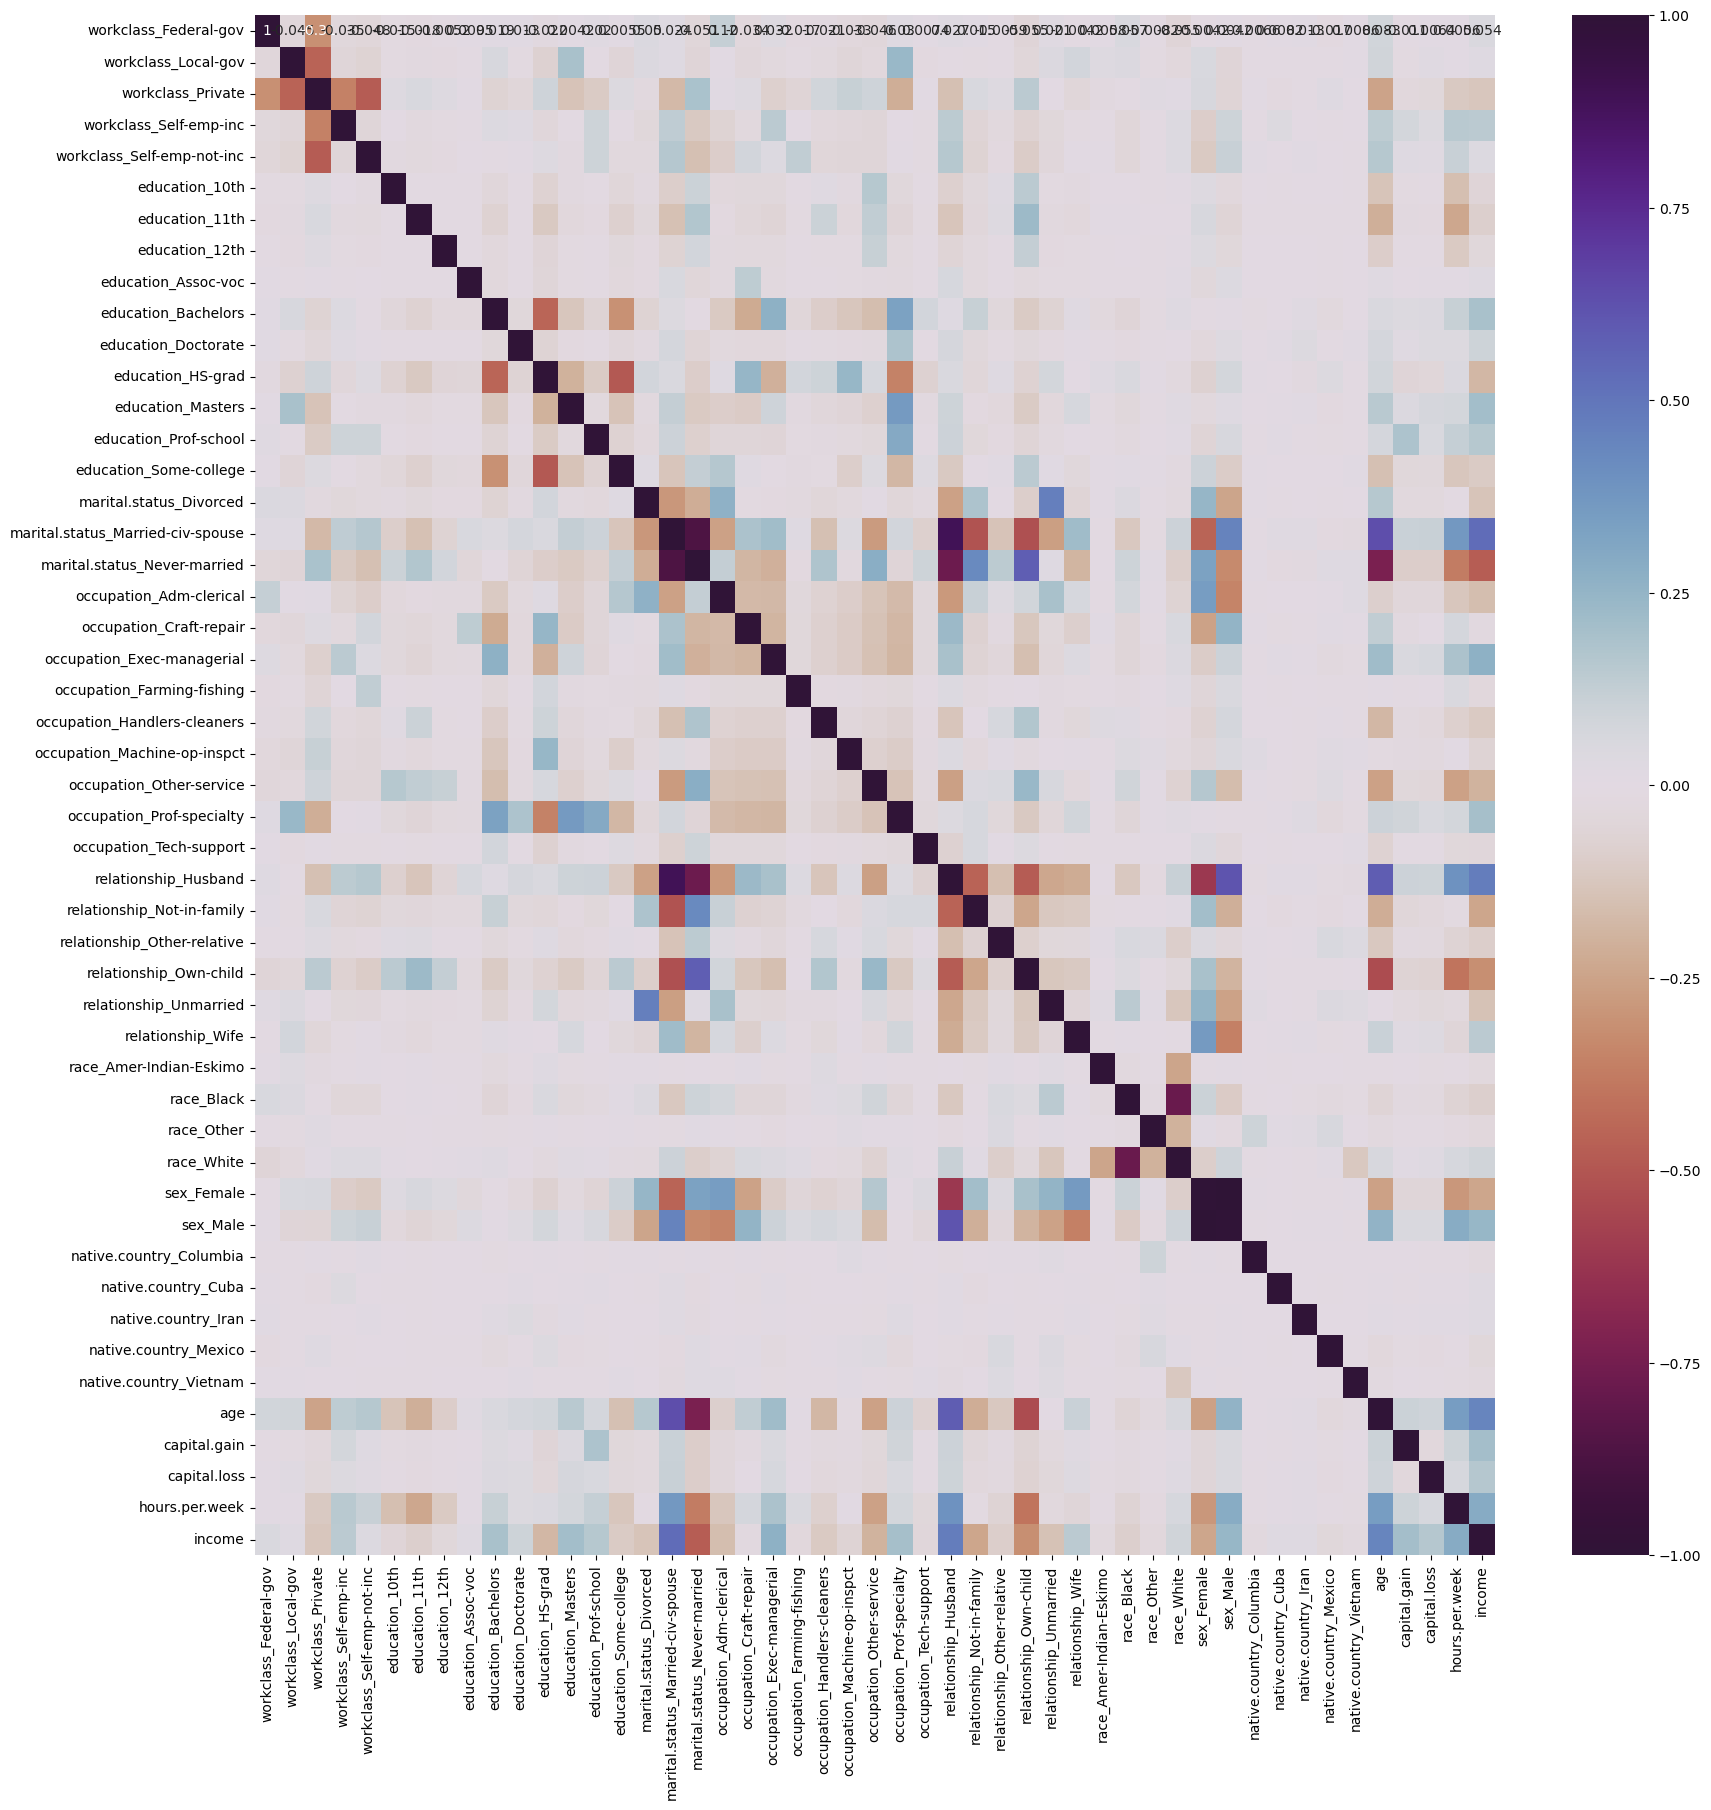

In [156]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = adult_new1[features].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(adult_new1[top_corr_features].corr(),annot=True,cmap="twilight_shifted_r")

<p><h3>4. EXPLORATORY DATA ANALYSIS</h3></p>


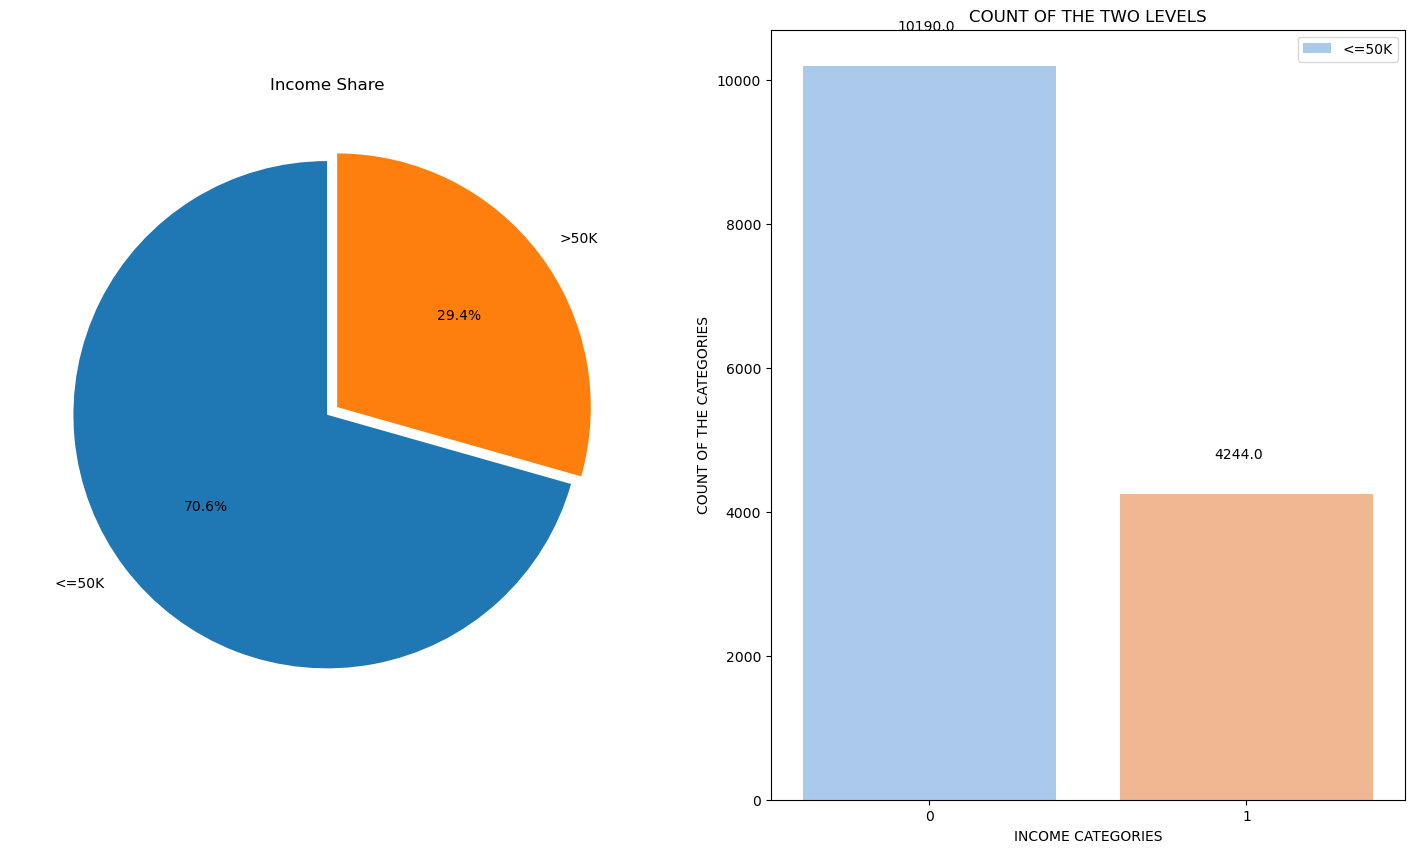

In [157]:
f,ax=plt.subplots(1,2,figsize=(18,10))
#plt.figure(figsize=(7,10))
income1=adult_new1['income'].value_counts()
ax[0].pie(income1,explode=(0,0.05),autopct='%1.1f%%',startangle=90,labels=['<=50K','>50K'])
ax[0].set_title('Income Share')
ax[1]=sns.countplot(x='income',data=adult_new1,palette='pastel')
ax[1].legend(labels=['<=50K','>50K'])
ax[1].set(xlabel="INCOME CATEGORIES")
ax[1].set(ylabel='COUNT OF THE CATEGORIES')
ax[1].set_title('COUNT OF THE TWO LEVELS')

for p in ax[1].patches:
    ax[1].annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+500))

<p>There is a total of 30162 observations with 7508 people earning more than 50K and 22654 earning less than or equal to 50K.
</p>
<p>
The percentage division can be clearly understood by the pie chart.</p>

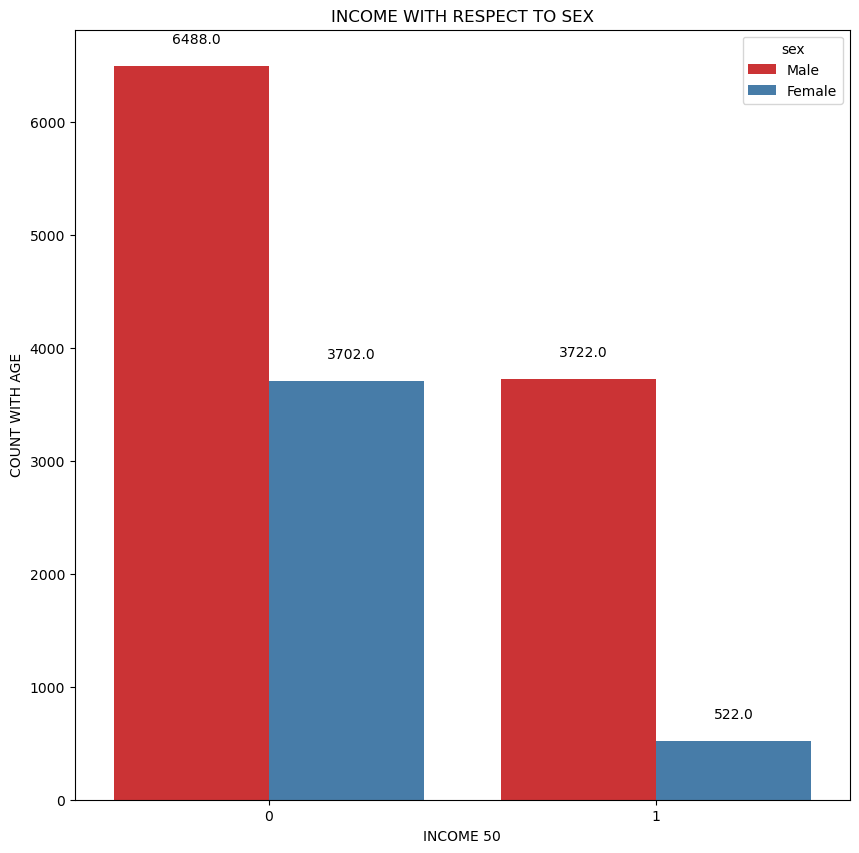

In [158]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='income',hue='sex',data=adult_new,palette='Set1')
ax.set(xlabel='INCOME 50')
ax.set(ylabel='COUNT WITH AGE')
ax.set_title('INCOME WITH RESPECT TO SEX')
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.15,p.get_height()+200))

<p>15% women are in >50 category and the rest are 85% men</p>
<p>38% women are in <=50 and the rest are 62% men</p>
<p>69% of all men earn <=50K while only 31% earn more than 50K</p>
<p>Only 10% of all women in the sample earn more than 50K while the rest 90% earn less than 50K</p>

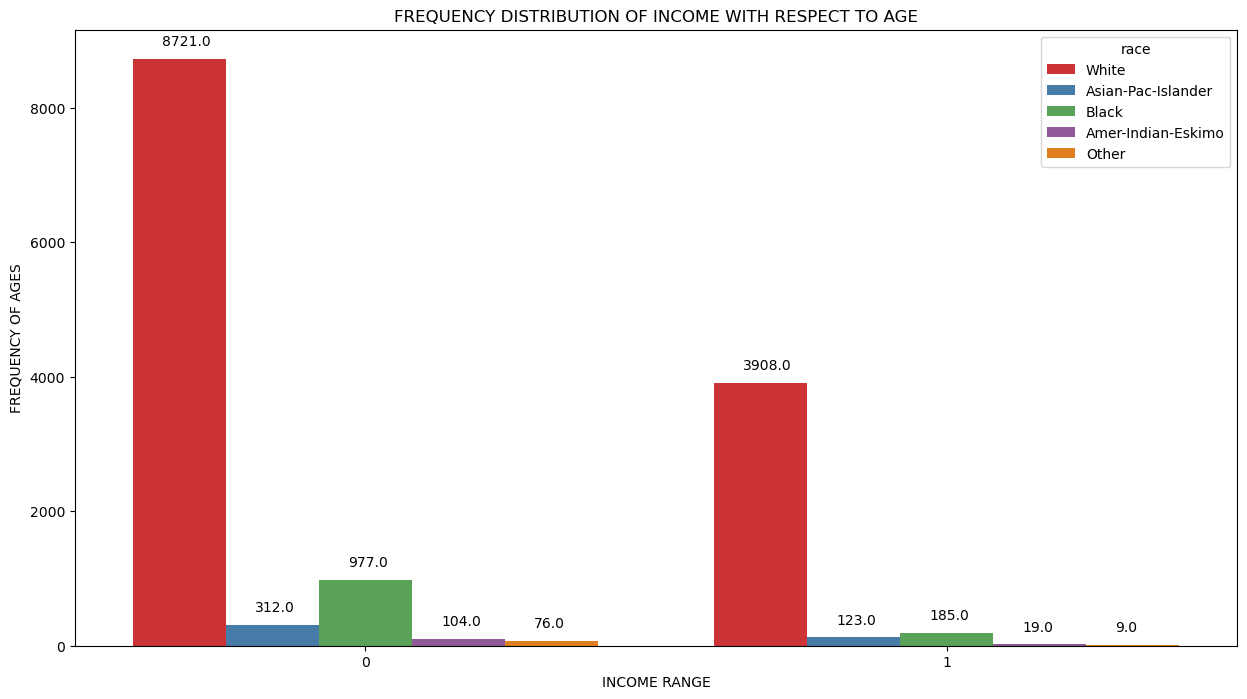

In [159]:
f, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x="income", hue="race", data=adult_new, palette="Set1")
ax.set_title("FREQUENCY DISTRIBUTION OF INCOME WITH RESPECT TO AGE")
ax.set(xlabel='INCOME RANGE',ylabel='FREQUENCY OF AGES')

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05,p.get_height()+200))
plt.show()


In [160]:
# # f, ax = plt.subplots(figsize=(12, 8))
# ax = sns.countplot(x="workclass", hue="income", data=adult_new, palette="Set2")
# ax.set_title("FREQUENCY DISTRIBUTION OF WORKCLASS WITH RESPECT TO INCOME")
# ax.set(xlabel='WORKCLASS RANGE',ylabel='FREQUENCY OF WORKCLASS')
# ax.legend(labels=['<=50K','>50K'],loc='upper right',fontsize='large')
# # plt.show()

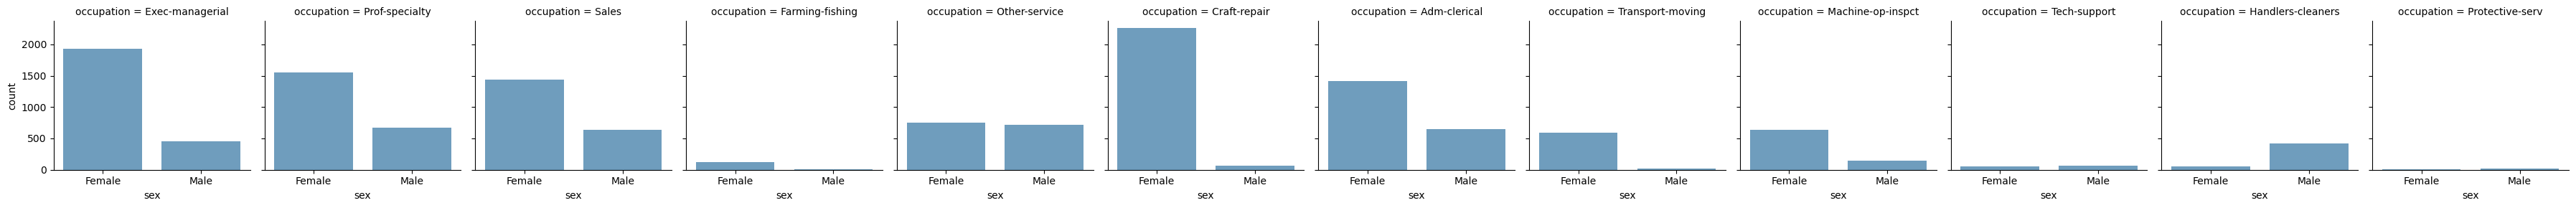

In [161]:
#adult1=sns.load_dataset("adult.csv")
g = sns.FacetGrid(adult, col="occupation")
g.map(sns.countplot,'sex',alpha=0.7)


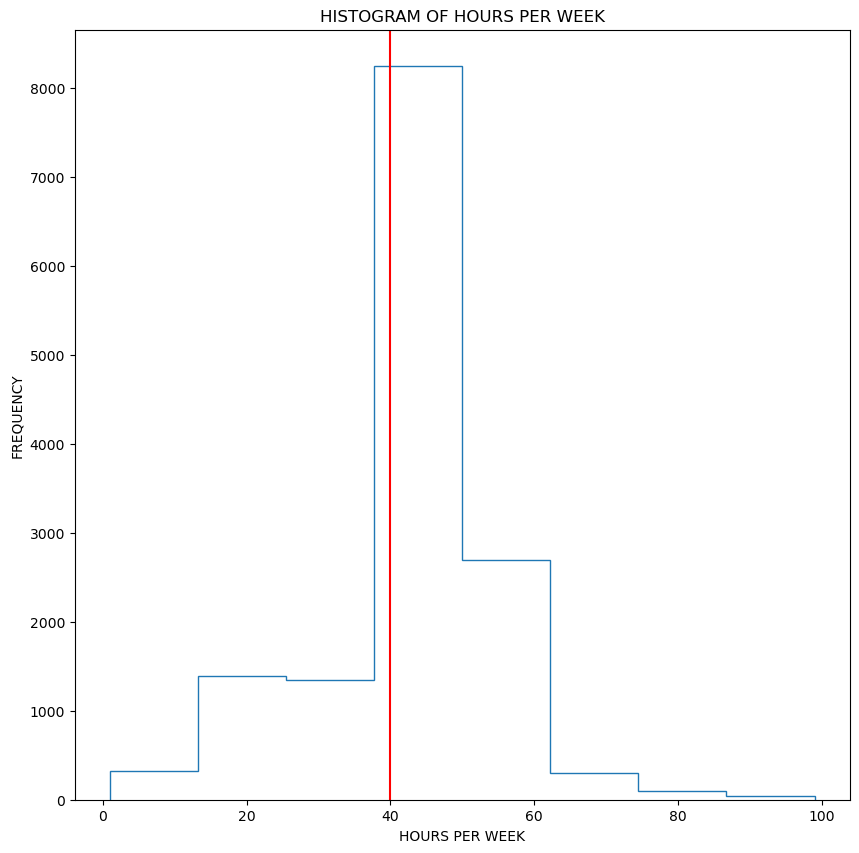

In [162]:
plt.figure(figsize=(10,10))
#sns.regplot(x='hours.per.week', y='fnlwgt',data=adult_new);
x=adult_new['hours.per.week']
plt.hist(x,bins=8,histtype='step')
plt.ylabel('FREQUENCY')#,xlabel='Hours per week')
plt.xlabel('HOURS PER WEEK')
plt.title('HISTOGRAM OF HOURS PER WEEK')
import statistics as stat
plt.axvline(stat.mode(x),color='red')
plt.show()

<p>Around 18K people work between 35 to 50 hours a day</p>

Maximum people around age  23  earn <=50K 

Maximum people around age  47  earn >50K 



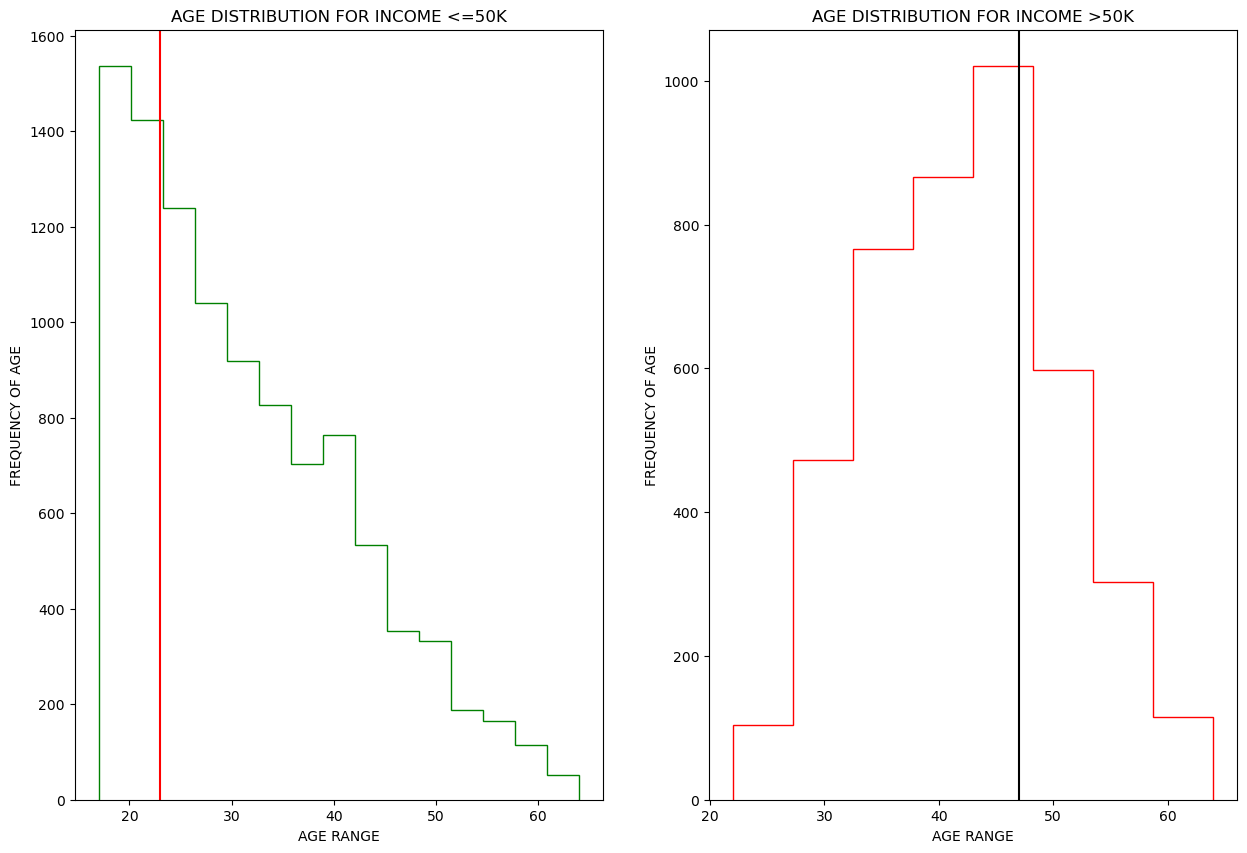

In [163]:
f,ax=plt.subplots(1,2,figsize=(15,10))

less=adult_new[adult_new['income']==0]
age_mode1=stat.mode(less.age)
more=adult_new[adult_new['income']!=0]
age_mode2=stat.mode(more.age)
#ax.axvline(age_mode1,age_mode2)
print('Maximum people around age ',age_mode1,' earn <=50K \n')
print('Maximum people around age ',age_mode2,' earn >50K \n')
ax[0].hist(less['age'],bins=15,histtype='step',color='green')
ax[0].set(xlabel='AGE RANGE',ylabel='FREQUENCY OF AGE')
ax[0].set_title('AGE DISTRIBUTION FOR INCOME <=50K')
ax[0].axvline(age_mode1,color='red')
ax[1].hist(more['age'],bins=8,histtype='step',color='red')
ax[1].set(xlabel='AGE RANGE',ylabel='FREQUENCY OF AGE')
ax[1].set_title('AGE DISTRIBUTION FOR INCOME >50K')
ax[1].axvline(age_mode2,color='black')
plt.savefig('Plots/age_distribution_private.png')

plt.show()


<h3><p>5. FITTING APPROPRIATE MODEL</p></h3>

In [164]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix,accuracy_score
chi2=adult_new1[features]


As seen in the first graph, there is a class imbalance problem. Models do not fit well when there is a class imbalance. There are some methods like oversampling, undersampling and mixture. I will do class oversampling using SMOTE(Synthetic Minority Oversampling  Technique). It creates new samples along the lines of the existing samples.

In [165]:
def train_print(clf,x_test,y_test):
    predictions = clf.predict(x_test)
    print('Precision report:\nprecision \t\t\t recall \t\t\t f-score \t\t\t support\n',
          precision_recall_fscore_support(y_test, predictions)[0],'\t',
          precision_recall_fscore_support(y_test, predictions)[1],
          '\t',precision_recall_fscore_support(y_test, predictions)[2],'\t',
          precision_recall_fscore_support(y_test, predictions)[3],'\n')
    print('Confusion matrix:\n',confusion_matrix(y_test, predictions),'\n')
    print('Accuracy score:',accuracy_score(y_test, predictions)*100,'\n')

Some jargons explained-

precision->true positives predicted

recall->true positives actually present

f score->harmonic mean between precision and recall

support->total number of samples in each class 

confusion matrix->gives the true positives and negatives and false positives and negatives.

The aim is to increase both the precision and recall. F score gives the balance between the two.

<p><h3>5.1 Logistic Regression</h3></p>

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

# Assuming chi2 is a DataFrame that has been defined earlier
x = chi2.drop('income', axis=1)
y = chi2['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
X_train, Y_train = SMOTE().fit_resample(x_train, y_train)

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

def train_print(model, x_test, y_test):
    predictions = model.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

train_print(logmodel, x_test, y_test)


Accuracy: 0.8112227225493592
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      2066
           1       0.62      0.87      0.72       821

    accuracy                           0.81      2887
   macro avg       0.78      0.83      0.79      2887
weighted avg       0.85      0.81      0.82      2887



In [167]:
# predict probabilities
lr_probs = logmodel.predict_proba(x_test)
#print(lr_probs)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
#print(lr_probs)
ns_probs = [0 for _ in range(len(y_test))]
#print(ns_probs)

In [168]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Random Prediction: ROC AUC=0.500
Logistic: ROC AUC=0.912


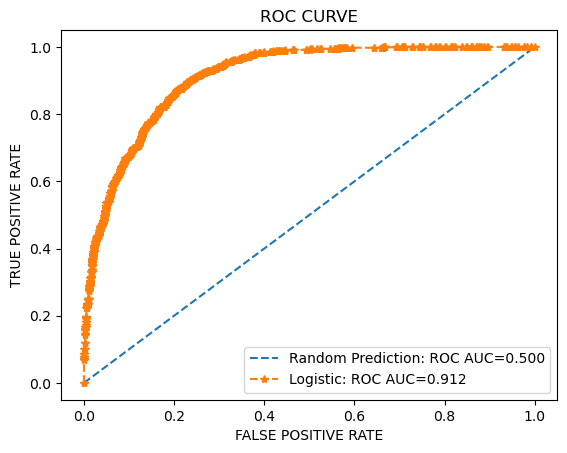

In [169]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Logistic: ROC AUC=%.3f' % (lr_auc))
# axis labels
plt.title('ROC CURVE')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.savefig('Plots/Logisticprivate.png')

plt.show()


The ROC curve gives how well the model predicted. Higher the percentage of area inside the arc better the model.

<p><h3>5.2 Decision Tree</h3></p>

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

# Assuming chi2 is a DataFrame that has been defined earlier
x = chi2.drop('income', axis=1)
y = chi2['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=8, max_depth=10)

# Train Decision Tree Classifier
clf.fit(x_train, y_train)

def train_print(model, x_test, y_test):
    predictions = model.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

train_print(clf, x_test, y_test)


Accuracy: 0.7908104363888248
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.75      0.84      3090
           1       0.59      0.90      0.71      1241

    accuracy                           0.79      4331
   macro avg       0.77      0.82      0.77      4331
weighted avg       0.84      0.79      0.80      4331



In [171]:
# predict probabilities
dt_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
dt_probs1 = dt_probs[:, 1]
#lr_probs2 = lr_probs[:,0]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs1)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Deciison Tree: ROC AUC=%.3f' % (dt_auc))

Random Prediction: ROC AUC=0.500
Deciison Tree: ROC AUC=0.903


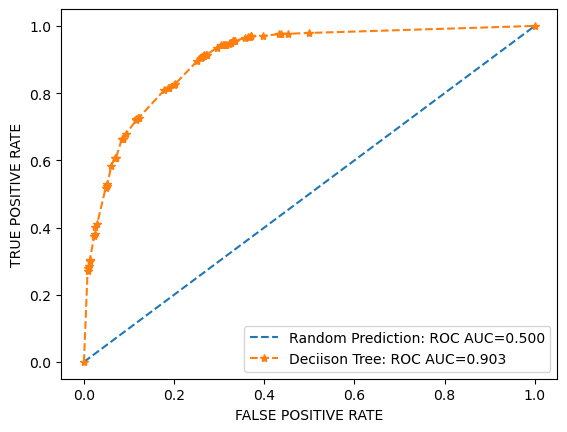

In [172]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs1)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(dt_fpr, dt_tpr, linestyle='--',marker='*',label='Deciison Tree: ROC AUC=%.3f' % (dt_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.savefig('Plots/Prediction_treeprivate.png')

plt.show()


<p><h3>5.3 Naive Bayes</h3></p>

In [173]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

# Create a Gaussian Classifier
model = GaussianNB()

# Assuming chi2 is a DataFrame that has been defined earlier
x = chi2.drop('income', axis=1)
y = chi2['income']

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Resample the training data
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

# Train the model using the training sets
gnb = model.fit(x_train, y_train)

def train_print(model, x_test, y_test):
    predictions = model.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

train_print(gnb, x_test, y_test)


Accuracy: 0.6906823692414271
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.58      0.73      2066
           1       0.48      0.97      0.64       821

    accuracy                           0.69      2887
   macro avg       0.73      0.78      0.68      2887
weighted avg       0.84      0.69      0.70      2887



Random Prediction: ROC AUC=0.500
Naive Bayes: ROC AUC=0.828


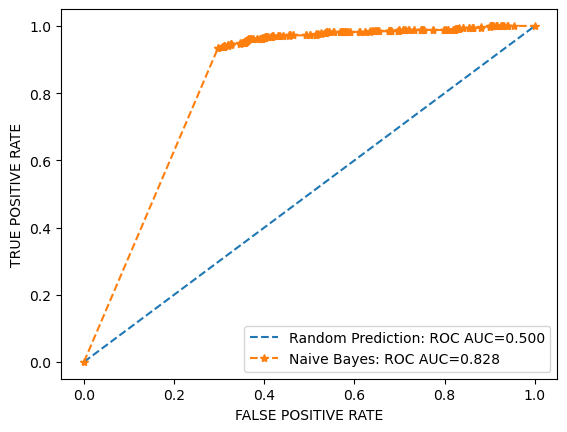

In [174]:
# predict probabilities
nb_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]
#lr_probs2 = lr_probs[:,0]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.savefig('Plots/roc_Random_naiveprivate.png')

plt.show()



<p><h3>5.4 Random Forest</h3></p>

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

# Create a Random Forest Classifier
rf = RandomForestClassifier(min_samples_split=30)

# Assuming chi2 is a DataFrame that has been defined earlier
x = chi2.drop('income', axis=1)
y = chi2['income']

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Resample the training data
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

# Train the model using the training sets
rf.fit(x_train, y_train)

def train_print(model, x_test, y_test):
    predictions = model.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))

train_print(rf, x_test, y_test)


Accuracy: 0.8293696605864697
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      3090
           1       0.66      0.83      0.74      1241

    accuracy                           0.83      4331
   macro avg       0.79      0.83      0.80      4331
weighted avg       0.85      0.83      0.83      4331



Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.917


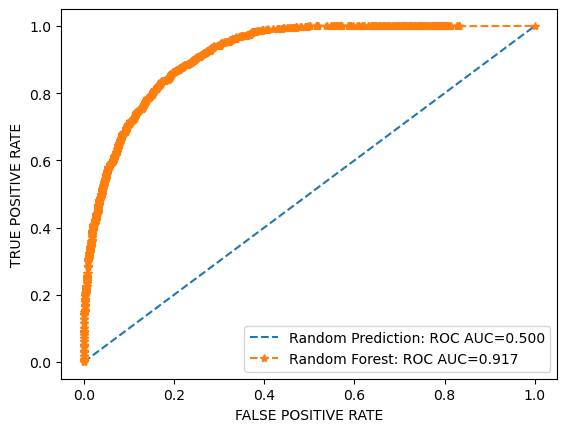

In [176]:
# predict probabilities
rf_probs = rf.predict_proba(x_test)
# keep probabilities for the positive outcome only
rf_probs1 = rf_probs[:, 1]
#lr_probs2 = lr_probs[:,0]
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs1)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.savefig('TPR_FPR')

plt.show()


<p><h3>6. COMPARING ALL MODELS BY THEIR ROC </h3> </p>

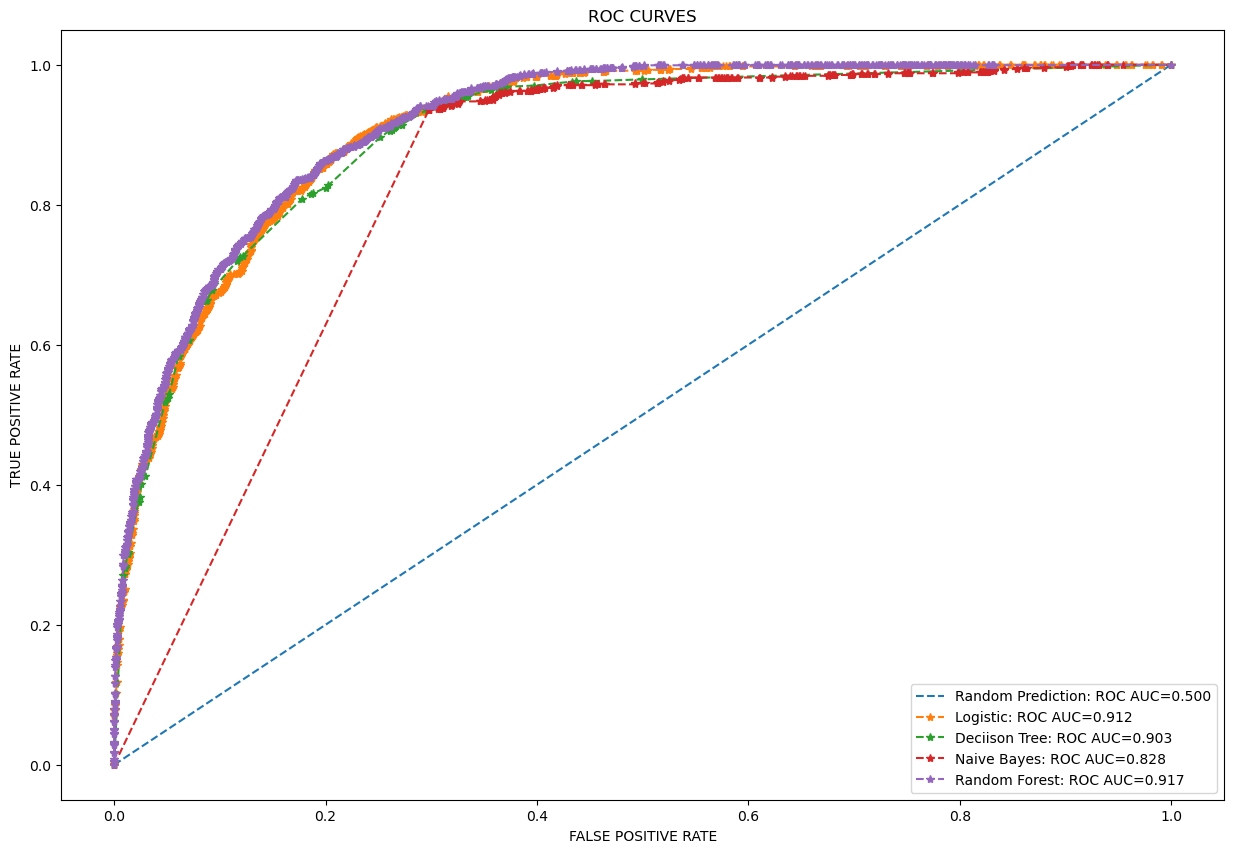

In [177]:
plt.figure(figsize=(15,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Logistic: ROC AUC=%.3f' % (lr_auc))
plt.plot(dt_fpr, dt_tpr, linestyle='--',marker='*',label='Deciison Tree: ROC AUC=%.3f' % (dt_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
# show the legend
plt.legend()
# show the plot
plt.savefig('Plots/roc_curvesprivate.png')

plt.show()


<p> Random Forest performs the best with area of 0.91 under the curve.</p>